<a href="https://colab.research.google.com/github/soyeunju/ESAA/blob/main/HM7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HM 7

## Exercise 2.3.3. Iris data (Offline)

We will be using the famous Iris dataset, which contains measurements of the sepal length, sepal width, petal length, and petal width for three species of iris flowers (Iris setosa, Iris versicolor, and Iris virginica). The goal is to predict the species of an iris flower based on these measurements.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset

# Load the Iris dataset
iris = load_iris()

# Convert the data to PyTorch tensors
X = torch.tensor(iris.data, dtype=torch.float32)
y = torch.tensor(iris.target, dtype=torch.long)

t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
t = torch.tensor(t, dtype=torch.float32)


# Normalize the input data
mean = torch.mean(X, dim=0)
std = torch.std(X, dim=0)
X = (X - mean) / std

# Split the dataset into training and validation sets
X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.2, random_state=42)

# Create PyTorch Datasets
train_dataset = TensorDataset(X_train, t_train)
val_dataset = TensorDataset(X_val, t_val)

# Define the data loaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


<ipython-input-2-5129eba6305c>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
<ipython-input-2-5129eba6305c>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t, dtype=torch.float32)


In [3]:
print(X.shape, t.shape)

torch.Size([150, 4]) torch.Size([150, 3])


## Exercise 2.3.4 Revisiting Iris data (HW)

We use `train_loader` to train the model, and use `test_loader` to calculate the test accuracy. Use the following code to train the model, and calculate the test accuracy. In this case, you need to define your own loss function to calculate cross-entropy function from `q_hat` and `tt`.
```
z_model = nn.Linear(784, 10, bias=True)
```
and
```
for xx, tt in train_loader:
  zhat = z_model(xx)
  q_hat = torch.softmax()
```

In [4]:
## train the model
forward = torch.nn.Linear(4,3, bias = True)
optimizer = torch.optim.SGD(forward.parameters(),lr = 0.1)

def loss_ftn(t,q):
  return -torch.mean(torch.sum(t * torch.log(q), axis = 1))

history = []
epochs = 10000
n = len(train_loader.dataset)

for epoch in range(epochs):
  LOSS = 0
  for xx, t in train_loader:
    b = forward(xx)
    q = torch.softmax(b, dim = 1)
    loss = loss_ftn(t,q)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    LOSS += loss.item()*len(xx)
  history.append(LOSS/n)

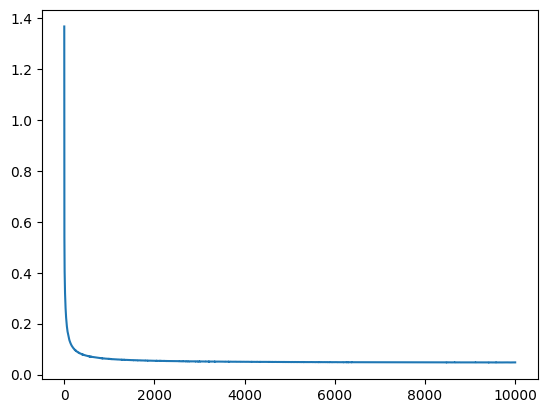

In [5]:
import matplotlib.pyplot as plt
plt.plot(history)

In [6]:
## calculate test accuracy
Correct = 0
n_test = len(test_loader.dataset)
for xx, t in test_loader:
  b = forward(xx)
  q = torch.softmax(b, dim = 1)
  Yhat = torch.argmax(q, axis = 1)*1.0
  Y = torch.argmax(t, axis = 1)*1.0
  correct = torch.sum((Yhat == Y)*1.0) ## True / False 에 1.0 곱함
  Correct += correct

Correct/n_test

tensor(1.)

## Exercise 2.3.5: Fashion MNIST data (HW)

You are given the following fashion MNIST data. Do the multinomial regression so that the regression machine can determine the label from the images. Calculate the test accuracy. In the test dataset, identify at least 5 cases where your predictions are wrong, and explain why possibly they were mis-classified.

1. the picture

2. predicted label

3. real label

4. Explain the possible reason why your model is wrong in this case.

Hint: Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [16]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [17]:
# transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
validationset = datasets.FashionMNIST('./data', download=True, train=False, transform=transform)
test_loader = DataLoader(validationset, batch_size=64, shuffle=True)

In [18]:
xx, yy = trainset[0]
xx.shape

torch.Size([1, 28, 28])

Ankle boot


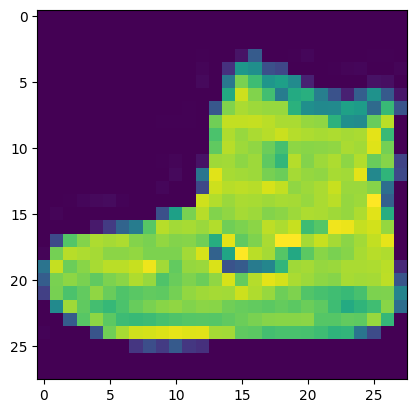

In [19]:
import matplotlib.pyplot as plt

plt.imshow(xx.reshape(28,28))
my_name = { 0: "T-shirt/top", 1: "Trouser",
              2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
print(my_name[yy])



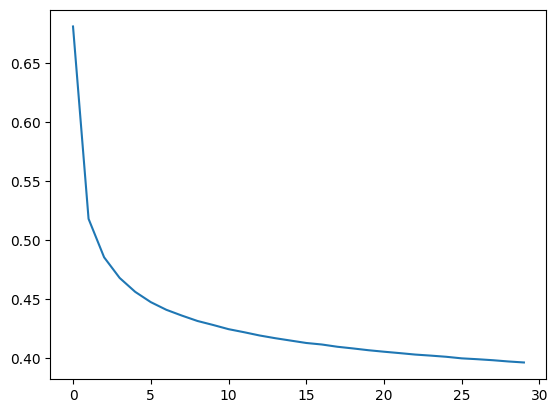

In [6]:
## train the model
forward = torch.nn.Linear(28*28, 10, bias = True)
loss_ftn = torch.nn.CrossEntropyLoss(reduction = 'mean')
optimizer = torch.optim.SGD(forward.parameters(), lr=0.01)

history=[]
epochs = 30
n = len(train_loader.dataset)

for epoch in range(epochs):
  epoch_loss = 0.0
  for xx, tt in train_loader:
    xx = xx.view(xx.size(0), -1)
    zhat = forward(xx)
    loss = loss_ftn(zhat, tt)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_loss += loss.item()*len(xx)
  history.append(epoch_loss/n)
plt.plot(history)

In [7]:
## calculate test accuracy
Correct = 0
n_test = len(test_loader.dataset)
for xx, t in test_loader:
  xx = xx.view(xx.size(0), -1)
  b = forward(xx)
  q = torch.softmax(b, dim = 1)
  Yhat = torch.argmax(q, axis = 1)*1.0
  correct = torch.sum((Yhat == t)*1.0)
  Correct += correct

Correct/n_test

tensor(0.8423)

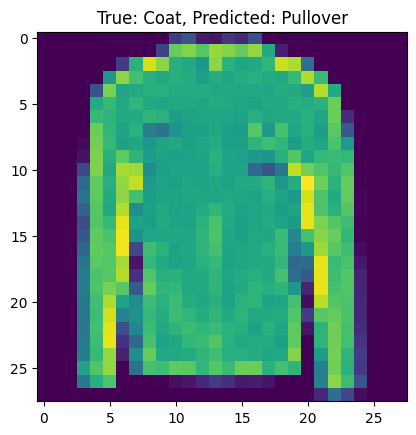

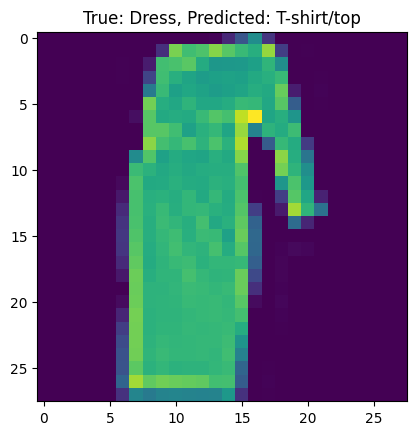

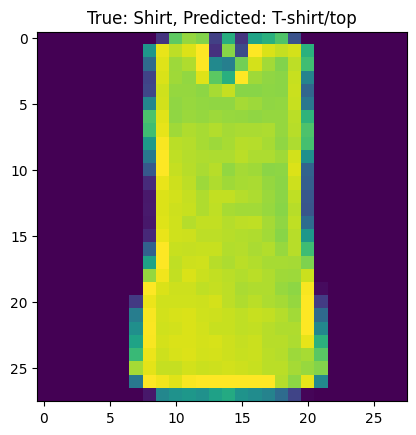

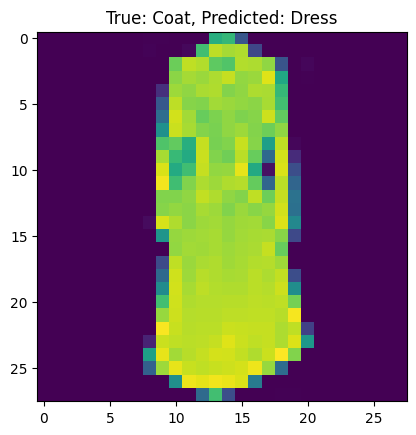

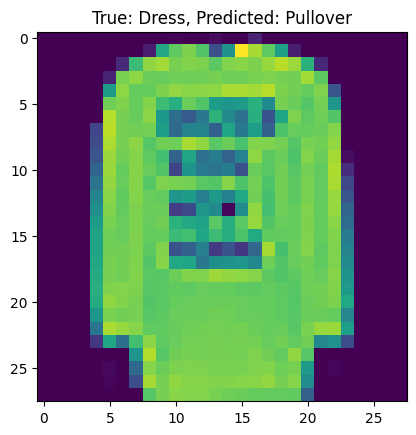

In [27]:
## identify at least 5 cases where your predictions are wrong
## and explain why possibly they were mis-classified

for xx, tt in test_loader:
    xx = xx.view(xx.size(0), -1) # 3d -> 2d
    zhat = forward(xx)
    predictions = torch.argmax(zhat, dim=1)  # Predicted labels

    wrong_predictions_count = 0

    for i in range(len(tt)):
        if predictions[i] != tt[i]:  # Predicted label and True label 비교
            plt.imshow(xx[i].squeeze().numpy()) #[28,28]로 변환
            plt.title(f"True: {my_name[tt[i].item()]}, Predicted: {my_name[predictions[i].item()]}")
            plt.show()

            wrong_predictions_count += 1
            if wrong_predictions_count >= 5:
                break
    break


아마도 분류 라벨 간 매우 비슷한 시각적 특징을 가지고 있어 모델이 이를 구분하는데 어려움을 겪은 것으로 보임.